<a href="https://colab.research.google.com/github/sabotagefrenzy/Spam-Detection-GDSC/blob/main/SpamDetection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
import nltk
import heapq
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
df = pd.read_csv('spam_ham_dataset.csv', encoding='latin-1')
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [39]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['#', 'label','message','label_num']
df.head()

,#,label,message,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [40]:
df['message_len'] = df.message.apply(len)
df.head()

,#,label,message,label_num,message_len
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


Text(0.5, 0, 'Message Length')

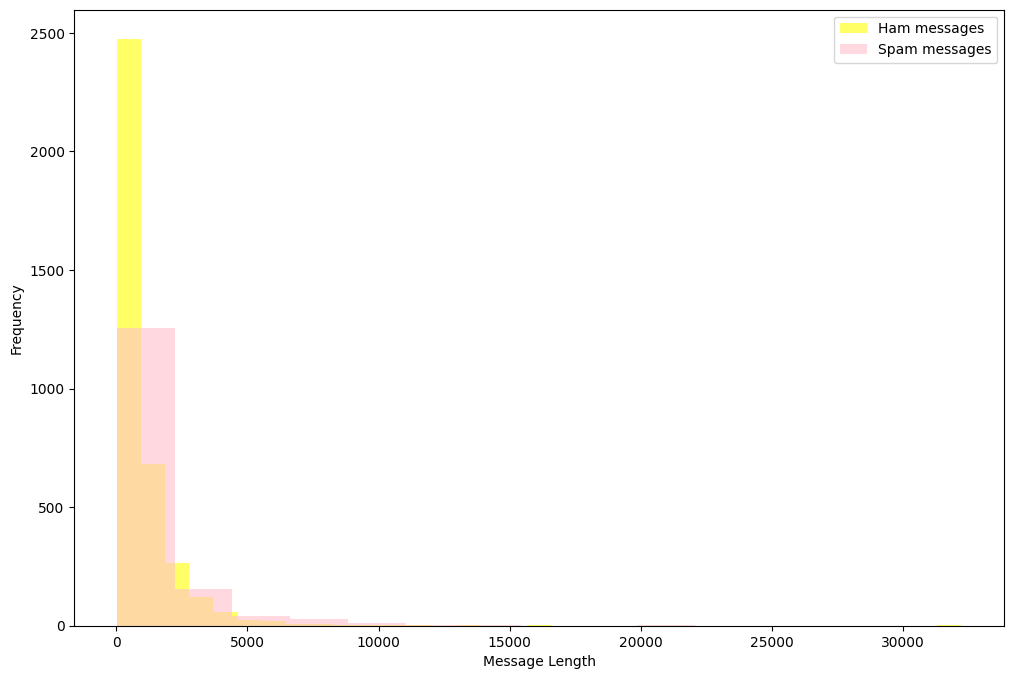

In [41]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='yellow',
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='pink',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [42]:
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

df.head()

,#,label,message,label_num,message_len
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [43]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['clean_msg']= df['message'].apply(lambda x:remove_punctuation(x))
df.head()

,#,label,message,label_num,message_len,clean_msg
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,Subject enron methanol meter 988291\r\nthis...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,Subject hpl nom for january 9 2001\r\n see at...
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,Subject neon retreat\r\nho ho ho we re aroun...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,Subject photoshop windows office cheap mai...
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,Subject re indian springs\r\nthis deal is to ...


In [44]:
print(df.columns)

Index(['#', 'label', 'message', 'label_num', 'message_len', 'clean_msg'], dtype='object')


In [45]:
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5171,)
(5171,)
(3878,)
(1293,)
(3878,)
(1293,)


In [46]:
featurizer = CountVectorizer()
featurizer.fit(X_train)
X_train_dtm = featurizer.transform(X_train)
X_train_dtm = featurizer.fit_transform(X_train)
print(type(X_train_dtm), X_train_dtm.shape)
X_test_dtm = featurizer.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3878, 42232)
<class 'scipy.sparse._csr.csr_matrix'> (1293, 42232)


In [47]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<3878x42232 sparse matrix of type '<class 'numpy.float64'>'
	with 340940 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
y_pred_class = nb.predict(X_test_dtm)
cm = confusion_matrix(y_test, y_pred_class)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
# Precision
precision = precision_score(y_test, y_pred_class)
# Recall
recall = recall_score(y_test, y_pred_class)
# F1-Score
f1 = f1_score(y_test, y_pred_class)
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)
roc_auc = auc(fpr, tpr)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", round(accuracy,4)*100,"%")
print("Precision:", round(precision,4)*100,"%")
print("Recall:", round(recall,4)*100,"%")
print("F1-Score:", round(f1,3)*100,"%")
print("ROC AUC:", round(roc_auc,4)*100,"%")

Confusion Matrix:
[[903  11]
 [ 11 368]]
Accuracy: 98.3 %
Precision: 97.1 %
Recall: 97.1 %
F1-Score: 97.1 %
ROC AUC: 97.95 %


In [49]:
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('the', 18359), ('to', 15172), ('ect', 13897), ('for', 7982), ('and', 7912), ('hou', 7281), ('enron', 6555), ('subject', 6403), ('on', 6049), ('a', 6026), ('of', 5677), ('you', 5365), ('i', 5241), ('is', 4906), ('this', 4878), ('in', 4570), ('2000', 4308), ('be', 3757), ('will', 3441), ('that', 3419), ('from', 3210), ('have', 3209), ('we', 3202), ('at', 2991), ('gas', 2861), ('deal', 2789), ('com', 2717), ('please', 2715), ('if', 2586), ('with', 2516), ('meter', 2459), ('am', 2405), ('cc', 2359), ('by', 2329), ('pm', 2325), ('hpl', 2318), ('it', 2246), ('are', 2220), ('s', 2111), ('your', 2090), ('me', 2059), ('2001', 2024), ('1', 2023), ('as', 1956), ('not', 1911), ('daren', 1901), ('000', 1880), ('00', 1819), ('10', 1815), ('thanks', 1813)]


In [50]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('the', 7254), ('to', 5160), ('and', 4903), ('of', 4490), ('a', 3787), ('in', 3129), ('you', 2794), ('for', 2523), ('this', 2283), ('is', 2256), ('your', 1946), ('subject', 1657), ('with', 1470), ('that', 1348), ('s', 1316), ('be', 1303), ('or', 1301), ('on', 1259), ('3', 1239), ('as', 1199), ('are', 1167), ('i', 1138), ('we', 1137), ('it', 1088), ('not', 1042), ('our', 1035), ('com', 992), ('http', 983), ('from', 981), ('have', 887), ('all', 883), ('2', 858), ('no', 757), ('at', 743), ('company', 728), ('1', 720), ('0', 698), ('will', 691), ('by', 668), ('e', 631), ('can', 613), ('an', 607), ('more', 603), ('here', 587), ('www', 587), ('00', 585), ('any', 551), ('if', 549), ('information', 520), ('font', 515)]


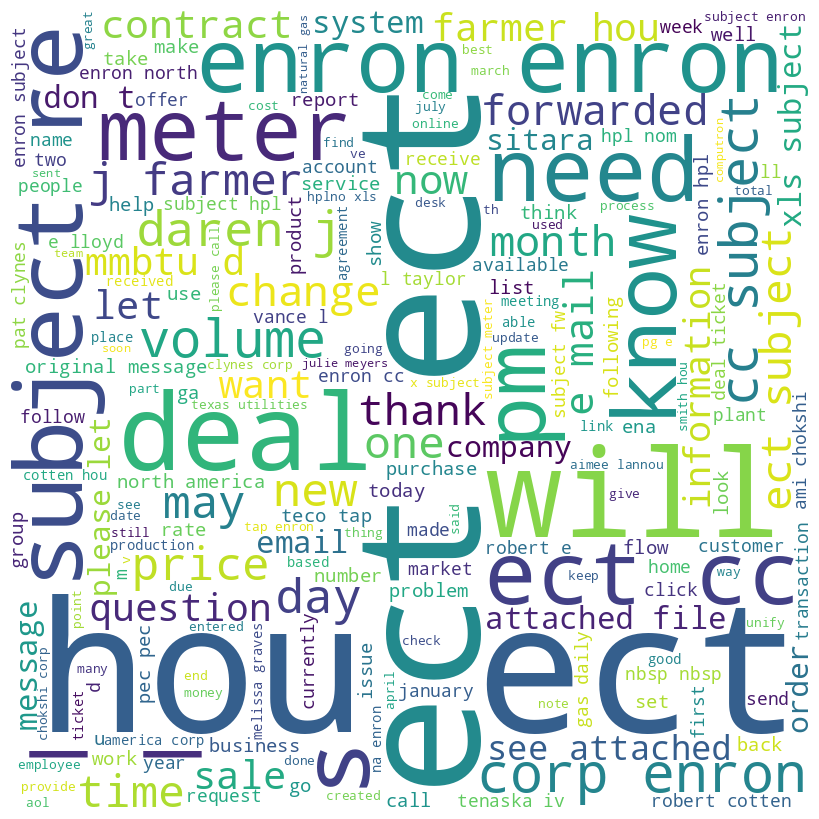

In [51]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.message:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [52]:
#false postives
X_test[y_pred_class > y_test]

1132    Subject enron and chase manhattan bank sign lo...
1159    Subject welcome to the next wave in digital mu...
2858    Subject important video announcement\r\ni have...
544              Subject christmas tree farm pictures\r\n
1924    Subject hunter singing at christmas program\r\...
1264    Subject flood pictures from the tunnels under ...
4287    Subject the expatriate zone  issue  1 2  14  0...
2646    Subject new tax law update\r\nwhether you  re ...
1495    Subject fw  danger of phenylpropanolamine\r\n ...
2088    Subject aol instant messenger confirmation\r\n...
2860    Subject aol instant messenger reconfirmation\r...
Name: clean_msg, dtype: object

In [53]:
#false negatives
X_test[y_pred_class < y_test]

1630    Subject hey \r\nhi  i am looking for new frien...
4404    Subject mail delivery  failure pascal  ecs  so...
2538                                         Subject \r\n
4447    Subject new flat\r\ndmortgage\r\nget a zfree q...
3108    Subject i promised to help 5000 people\r\nplea...
593     Subject re  network at wed  11 aug 2004 18  51...
246     Subject re  i know what you wish for\r\ngoodby...
1933                                     Subject note\r\n
1508                                   Subject re  8 \r\n
579     Subject  iceoe aoauau oauei ie caue aoe  ei\r\...
3459    Subject hello\r\nmail transaction failed  part...
Name: clean_msg, dtype: object